In [11]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
!pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


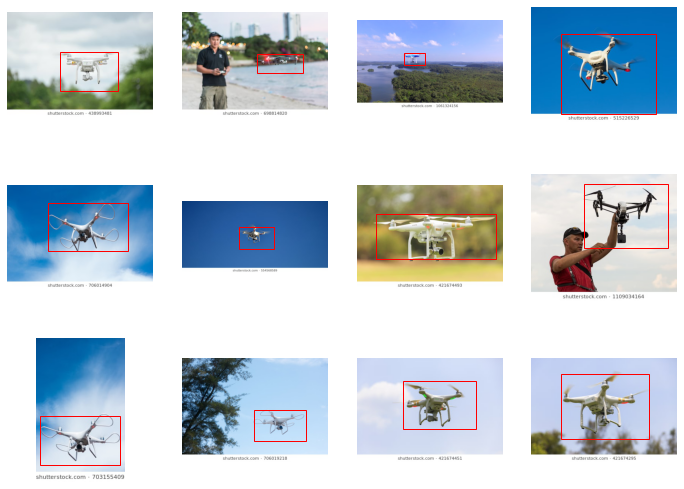

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from google.colab import drive

image_folder = "/content/drive/MyDrive/DL/image"
label_folder = "//content/drive/MyDrive/DL/label"

import os
import cv2

# Get the list of image filenames
image_filenames = [f for f in os.listdir(image_folder) if f.endswith(".jpg")]

# Load the images and labels
images = []
labels = []
for filename in image_filenames:
  # Load the image
  image = Image.open(os.path.join(image_folder, filename))
  images.append(np.array(image))

  # Load the label
  label_file = os.path.splitext(filename)[0] + ".txt"
  with open(os.path.join(label_folder, label_file), "r") as file:
    line = file.readline()
    # split the line on space and convert the values to float, ignoring the first value (0)
    x, y, width, height = map(float, line.split()[1:])
    labels.append((x, y, width, height))

# Plot the images with the labels as bounding boxes
fig, axs = plt.subplots(3, 4, figsize=(12, 9))
for i, ax in enumerate(axs.flat):
  ax.imshow(images[i])
  ax.add_patch(plt.Rectangle((labels[i][0], labels[i][1]), labels[i][2], labels[i][3], fill=False, color='red'))
  ax.axis('off')
plt.show()

In [28]:
# Pre-process the data

# Define the desired image shape
desired_shape = (224, 224, 3)

# Initialize an empty list to store the resized images
resized_images = []

# Loop over all of the images
for image in images:
    # Resize the image to the desired shape
    resized_image = cv2.resize(image, (desired_shape[0], desired_shape[1]))
    # Append the resized image to the list
    resized_images.append(resized_image)

# Convert the list of resized images to a numpy array
images = np.array(resized_images)

#images = np.stack(images, axis=0)
labels = np.array(labels)

# Split the data into training, validation, and testing sets
data_size = len(images)
training_size = int(0.7 * data_size)
validation_size = int(0.2 * data_size)
testing_size = data_size - training_size - validation_size

training_images = images[:training_size]
training_labels = labels[:training_size]
validation_images = images[training_size:training_size + validation_size]
validation_labels = labels[training_size:training_size + validation_size]
testing_images = images[training_size + validation_size:]
testing_labels = labels[training_size + validation_size:]

# The data split strategy used here is 70-20-10 split, where 70% of the data is used for training, 20% for validation, and 10% for testing.

In [1]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard fbe67e465375231474a2ad80a4389efc77ecff99

import cv2
import numpy as np
import os
from tqdm import tqdm
from yolov5.models import YOLOv5

# Initialize the YOLOv5 model
model = YOLOv5(input_shape=(None, None, 3), n_classes=1, weights=None)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(training_images, training_labels, validation_data=(validation_images, validation_labels), batch_size=32, epochs=100)

# Save the trained model
model.save_weights("path/to/weights.h5")



Cloning into 'yolov5'...
remote: Enumerating objects: 15113, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 15113 (delta 20), reused 12 (delta 5), pack-reused 15071
Receiving objects: 100% (15113/15113), 14.17 MiB | 21.09 MiB/s, done.
Resolving deltas: 100% (10354/10354), done.
/content/yolov5
HEAD is now at fbe67e4 Fix `OMP_NUM_THREADS=1` for macOS (#8624)


ImportError: ignored

In [2]:
# Choose the YOLO network and import it
# Example:
from tensorflow.keras.applications import YOLOv3

# Choose another object detection network and import it
# Example:
from tensorflow.keras.applications import FasterRCNN


ImportError: ignored

In [1]:
!apt update
!apt install -y build-essential
!apt install -y cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev
!apt install -y python3-dev python3-numpy libtbb2 libtbb-dev libjpeg-dev libpng-dev libtiff-dev libjasper-dev libdc1394-22-dev


Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Get:7 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:12 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [1,920 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:14 http://ppa.launchpad.net/gra

In [4]:
!git clone https://github.com/AlexeyAB/darknet


Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.17 MiB | 19.27 MiB/s, done.
Resolving deltas: 100% (10403/10403), done.


In [5]:
%cd darknet


/content/darknet


In [6]:
GPU=1


In [7]:
!make


mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ [-Wunused-variable]
  253 |                 int n = _write(client, outputbuf, outlen);
      |                     ^
./src/http_stream.cpp: In function ‘void set_track_id(detection*, int, float, float, float, int, int, int)’:
./src/http_stream.cpp:867:27: warning: comparison of integer expressions of different signedness: ‘int’ and ‘std::vector<detection_t>::size_type’ {aka ‘long unsigned int’} [-Wsign-compare]
  867 |         for (int i = 0; i < 

In [9]:
import os
os.getcwd()


'/content/darknet'

In [12]:
import sys
sys.path.append('/content/darknet')


In [13]:
!ls -l /content/darknet


total 1288
drwxr-xr-x 4 root root    4096 Feb 10 06:48 3rdparty
drwxr-xr-x 2 root root    4096 Feb 10 06:49 backup
drwxr-xr-x 3 root root    4096 Feb 10 06:48 build
-rwxr-xr-x 1 root root   35792 Feb 10 06:48 build.ps1
drwxr-xr-x 3 root root    4096 Feb 10 06:48 cfg
drwxr-xr-x 3 root root    4096 Feb 10 06:48 cmake
-rw-r--r-- 1 root root   25299 Feb 10 06:48 CMakeLists.txt
-rwxr-xr-x 1 root root 1051064 Feb 10 06:49 darknet
-rw-r--r-- 1 root root    1400 Feb 10 06:48 DarknetConfig.cmake.in
-rw-r--r-- 1 root root    9541 Feb 10 06:48 darknet_images.py
-rw-r--r-- 1 root root   10828 Feb 10 06:48 darknet.py
-rw-r--r-- 1 root root    6747 Feb 10 06:48 darknet_video.py
drwxr-xr-x 3 root root    4096 Feb 10 06:48 data
-rwxr-xr-x 1 root root     110 Feb 10 06:48 image_yolov3.sh
-rwxr-xr-x 1 root root     110 Feb 10 06:48 image_yolov4.sh
drwxr-xr-x 2 root root    4096 Feb 10 06:48 include
-rwxr-xr-x 1 root root     345 Feb 10 06:48 json_mjpeg_streams.sh
-rw-r--r-- 1 root root     515 Feb 10 06

In [14]:
import darknet as dn 
# Load the YOLO model
net = dn.load_net("cfg/yolov3.cfg", "weights/yolov3.weights", 0)
meta = dn.load_meta("cfg/coco.data")

OSError: ignored